In [3]:
import pandas as pd

In [32]:
claims_df = pd.read_csv('../IBM_Debater_(R)_CE-EMNLP-2015.v3/current_working_dataset/claims.csv')
claims_df

Topic  \
0     This house believes that the sale of violent v...   
1     This house believes that the sale of violent v...   
2     This house believes that the sale of violent v...   
3     This house believes that the sale of violent v...   
4     This house believes that the sale of violent v...   
...                                                 ...   
2289  This house would enforce term limits on the le...   
2290  This house would enforce term limits on the le...   
2291  This house would enforce term limits on the le...   
2292  This house would enforce term limits on the le...   
2293  This house would enforce term limits on the le...   

                                    Claim original text  \
0     Exposure to violent video games causes at leas...   
1     video game violence is not related to serious ...   
2     some violent video games may actually have a p...   
3     exposure to violent video games causes both sh...   
4     Violent video games increase the violent tende...   
...                                                 ...   
2289  Term limits won't affect gridlock, being a qui...   
2290  Limiting terms deprives voters of the right to...   
2291  The lack of mandatory limits to tenure is rega...   
2292  contact with the affairs of state is one of th...   
2293     term limits continue to garner popular support   

                                Claim corrected version  
0     exposure to violent video games causes at leas...  
1     video game violence is not related to serious ...  
2     some violent video games may actually have a p...  
3     exposure to violent video games causes both sh...  
4      they increase the violent tendencies among youth  
...                                                 ...  
2289  Term limits won't affect gridlock, being a qui...  
2290  Limiting terms deprives voters of the right to...  
2291  the lack of mandatory limits to tenure as a da...  
2292  contact with the affairs of state is one of th...  
2293     term limits continue to garner popular support  

[2294 rows x 3 columns]

In [112]:
evidence_df = pd.read_csv('../IBM_Debater_(R)_CE-EMNLP-2015.v3/current_working_dataset/evidence.csv')
evidence_df.columns = ["Topic", "Claim original text", "Evidence", "Type of Evidence Information"]
evidence_df_factorized = evidence_df.apply(lambda s: s.map({k:i for i,k in enumerate(s.unique())}))

In [118]:
evidence_df_factorized_topic_0 = evidence_df_factorized.loc[evidence_df_factorized["Topic"] == 0]
evidence_df_factorized_topic_0_claim_0 = evidence_df_factorized_topic_0.loc[evidence_df_factorized_topic_0["Claim original text"] <= 2]

In [128]:
evidence_df_factorized_topic_0_claim_0

Topic  Claim original text  Evidence  Type of Evidence Information
0       0                    0         0                             0
1       0                    0         1                             0
2       0                    0         2                             0
3       0                    0         3                             0
4       0                    0         4                             0
5       0                    0         5                             1
6       0                    0         6                             1
7       0                    0         7                             2
8       0                    0         8                             2
9       0                    0         9                             2
10      0                    0        10                             2
11      0                    0        11                             2
12      0                    0        12                             2
13      0                    0        13                             2
14      0                    0        14                             2
15      0                    0        15                             2
16      0                    0        16                             2
17      0                    0        17                             2
18      0                    0        18                             2
19      0                    0        19                             2
20      0                    0        20                             2
21      0                    0        21                             2
22      0                    0        22                             2
23      0                    0        23                             2
24      0                    0        24                             2
25      0                    0        25                             3
26      0                    0        26                             0
27      0                    1        27                             0
28      0                    1        28                             0
29      0                    1        29                             3
30      0                    1        30                             3
31      0                    1        31                             1
32      0                    1        32                             1
33      0                    1        33                             0
34      0                    1        34                             1
35      0                    1        35                             3
36      0                    1        36                             0
37      0                    1        37                             3
38      0                    1        38                             3
39      0                    1        39                             1
40      0                    1        40                             1
41      0                    1        41                             1
42      0                    1        42                             3
43      0                    1        43                             3
44      0                    2        44                             0

In [119]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
G = nx.Graph()

In [126]:
G = nx.from_pandas_edgelist(evidence_df_factorized_topic_0_claim_0, source='Evidence', target='Claim original text', edge_attr=True, create_using=nx.DiGraph())

color_map = []

for node in G:
    if node <= 2:
        color_map.append("blue")
    else:
        color_map.append("green")


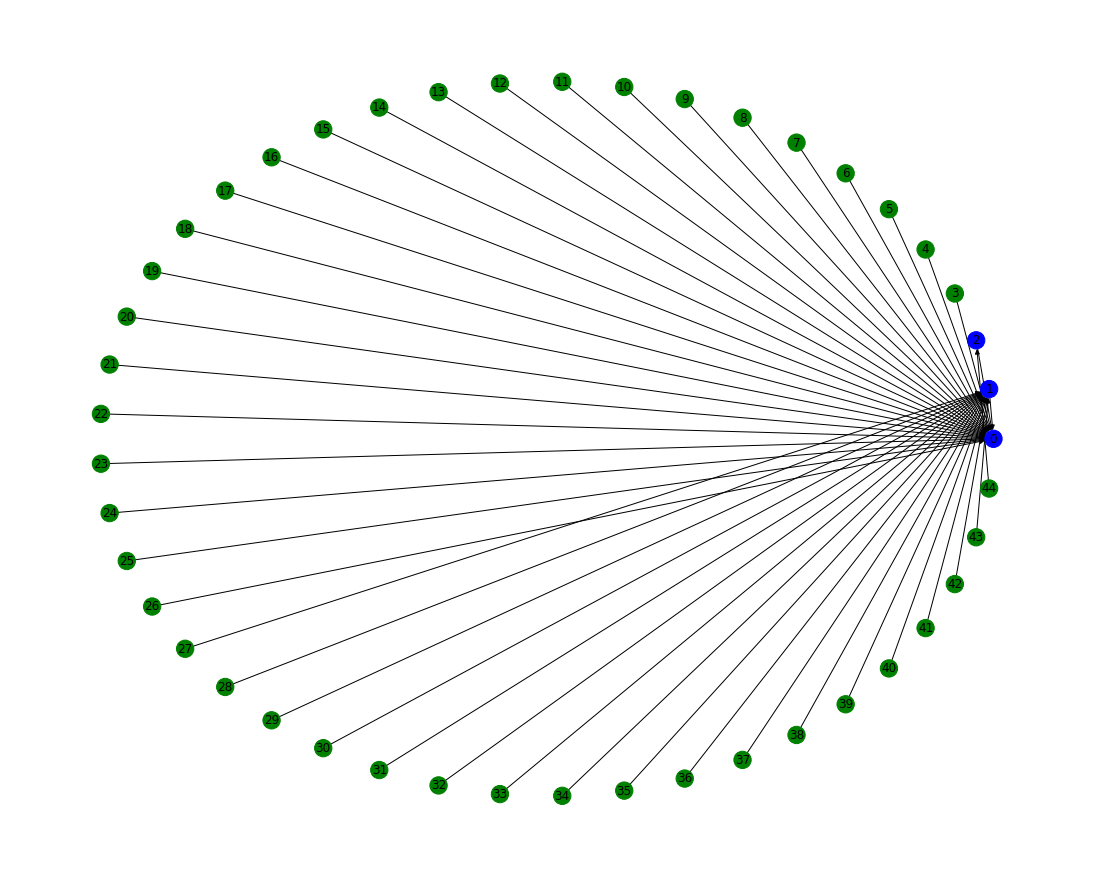

In [127]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_circular(G, with_labels=True, node_color=color_map)

In [111]:
# Convert strings to dictionary and map to appropriate columns

evidence_df['Count'] = [len(evidence_df[evidence_df['Evidence'].str.contains(value)]) for index, value in enumerate(evidence_df['Claim original text'])]

error: unterminated character set at position 81